In [ ]:
import pandas as pd
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df.isnull().sum()
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
print(df.head())

   age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    male   1       145   233    1        2      150      0      2.3   
1   67    male   4       160   286    0        2      108      1      1.5   
2   67    male   4       120   229    0        2      129      1      2.6   
3   37    male   3       130   250    0        0      187      0      3.5   
4   41  female   2       130   204    0        2      172      0      1.4   

   slope   ca  thal  target  
0      3  0.0   6.0       0  
1      2  3.0   3.0       1  
2      2  2.0   7.0       1  
3      3  0.0   3.0       0  
4      1  0.0   3.0       0  


In [ ]:
df['sex'] = df.sex.map({'female': 0, 'male': 1})


In [ ]:
################################## data preprocessing
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)


SVC()

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))




Accuracy for training set for svm = 0.9256198347107438
Accuracy for test set for svm = 0.8032786885245902


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7868852459016393


<Axes: >

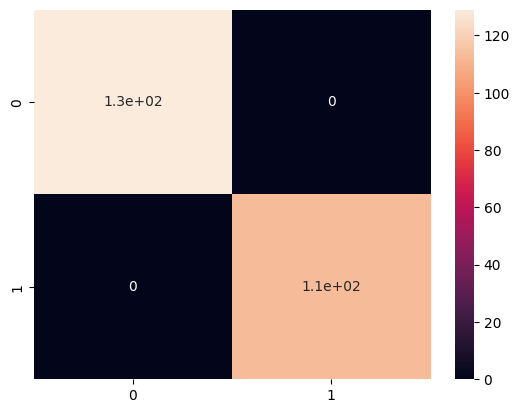

In [ ]:
sns.heatmap(confusion_matrix(y_pred_train, y_train),annot=True)

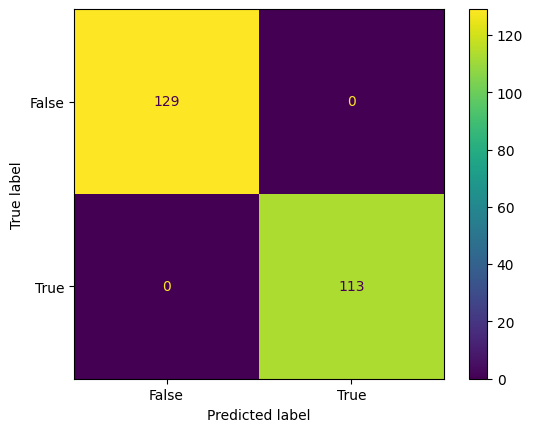

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_pred_train, y_train)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.7540983606557377


<Axes: >

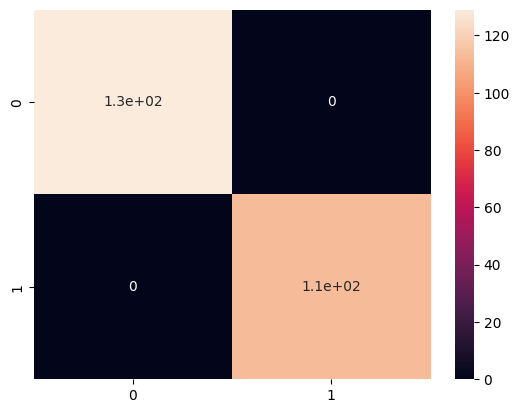

In [ ]:
sns.heatmap(confusion_matrix(y_pred_train, y_train),annot=True)

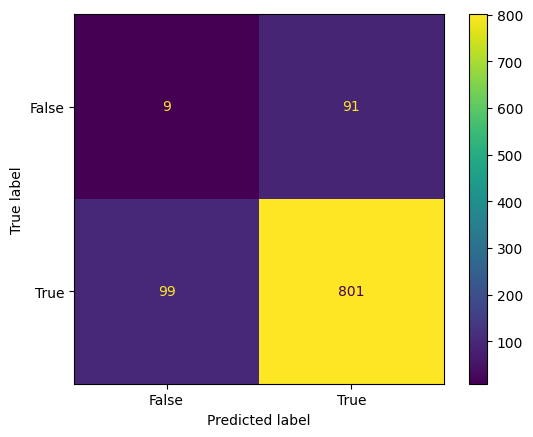

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting KNN classifier to the Training set
classifier = KNeighborsClassifier(n_neighbors = 5) # You can adjust the number of neighbors
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluating the model
cm_test = confusion_matrix(y_pred, y_test)
cm_train = confusion_matrix(classifier.predict(X_train), y_train)

# Printing the accuracies
print('Accuracy for training set for KNN = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for KNN = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for KNN = 0.7479338842975206
Accuracy for test set for KNN = 0.7049180327868853


<Axes: >

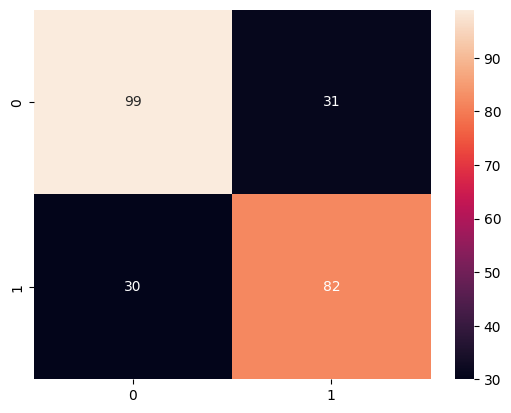

In [51]:
sns.heatmap(confusion_matrix(y_pred_train, y_train),annot=True)

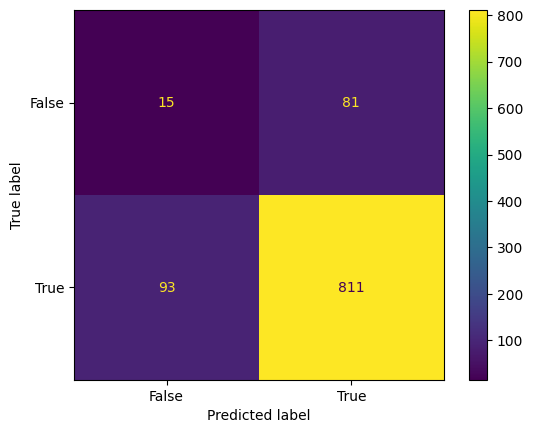

In [52]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# New Section

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
import pandas as pd
X=df.drop('target',axis=1)
y=df['target']
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)
new_data = pd.DataFrame({
    'age':80,
    'sex':1,
    'cp':0,
    'trestbps':195,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':200,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,
},index=[0])
new_data
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")




Disease
